In [3]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib
from matplotlib import pyplot as plt
import datetime

#Import data

In [7]:
df = yf.download(tickers = '^GSPC', period = '1y', interval = '1d') #^GSPC is S&P500
df.drop(columns =['Adj Close', 'Open', 'High', 'Low'], inplace = True)

[*********************100%***********************]  1 of 1 completed


In [8]:
dft = yf.download(tickers='^GSPTSE', period='1y', interval='1d')
dft.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)

[*********************100%***********************]  1 of 1 completed


In [12]:
print(f"Data from {df.index[0]} to {df.index[-1]}") #This would source data from beginning till end
#Using f-strings again, https://cito.github.io/blog/f-strings/
df.tail()

Data from 2019-07-30 00:00:00 to 2020-07-29 00:00:00


,Close,Volume
Date,,
2020-07-23,3235.659912,4290460000
2020-07-24,3215.629883,3894900000
2020-07-27,3239.409912,3963910000
2020-07-28,3218.439941,4027890000
2020-07-29,3258.439941,4676300000


In [11]:
print(f"Data from {dft.index[0]} to {dft.index[-1]}") #using f-strings again
dft.tail()

Data from 2019-07-29 00:00:00 to 2020-07-29 00:00:00


,Close,Volume
Date,,
2020-07-23,16018.700195,196712200
2020-07-24,15997.099609,166469100
2020-07-27,16161.299805,183667000
2020-07-28,16121.299805,191264800
2020-07-29,16294.700195,188311500


#Manipulate Data

In [14]:
def add_Change(df):
  df['Change'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1))*100
  return df

In [16]:
def add_SMA(df):   #SMA is like average
    df['SMA'] = (df['Change'] + df['Change'].shift(1) + df['Change'].shift(2)) * 1/3
    return df

In [17]:
df = add_Change(df)
df = add_SMA(df)

dft = add_Change(dft)
dft = add_SMA(dft)

In [18]:
df.tail()

,Close,Volume,Change,SMA
Date,,,,
2020-07-23,3235.659912,4290460000,-1.231986,-0.163125
2020-07-24,3215.629883,3894900000,-0.619040,-0.425439
2020-07-27,3239.409912,3963910000,0.739514,-0.370504
2020-07-28,3218.439941,4027890000,-0.647339,-0.175622
2020-07-29,3258.439941,4676300000,1.242838,0.445004


In [19]:
dft.tail()

,Close,Volume,Change,SMA
Date,,,,
2020-07-23,16018.700195,196712200,-0.942418,-0.340071
2020-07-24,15997.099609,166469100,-0.134846,-0.342384
2020-07-27,16161.299805,183667000,1.026437,-0.016942
2020-07-28,16121.299805,191264800,-0.247505,0.214695
2020-07-29,16294.700195,188311500,1.075598,0.618177


In [ ]:
#PLOT

In [25]:
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, ConciseDateFormatter

In [20]:
def manage_patches_color(patches):
    
    for patch in patches:
        if patch.get_height() >= 0:
            patch.set_color('#1E8449')
        else: 
            patch.set_color('#D13B1B')

In [21]:
def my_plotter(fig, ax, df, start_date, end_date, title):
    
    fig.set_size_inches(16,8)
    bar_output = ax.bar(x=df.loc[start_date:end_date].index, 
                 height=df.loc[start_date:end_date, 'Change'], alpha=0.8)
    manage_patches_color(patches=bar_output.patches)
    ax.plot(df.loc[start_date:end_date].index, df.loc[start_date:end_date, 'SMA'], color='#2D2624', linestyle='--', alpha=1)
    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.xaxis.set_major_locator(AutoDateLocator())
    ax.xaxis.set_major_formatter(ConciseDateFormatter(AutoDateLocator()))
    ax.grid(b=False, axis='x')
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_title(title)
    
    return bar_output

In [22]:
matplotlib.style.use('seaborn-whitegrid')
# specify the custom font to use
# plt.rcParams['font.family'] = 'Andale Mono'
# plt.rcParams['font.sans-serif'] = 'Regular'
plt.rcParams['font.size'] = 14

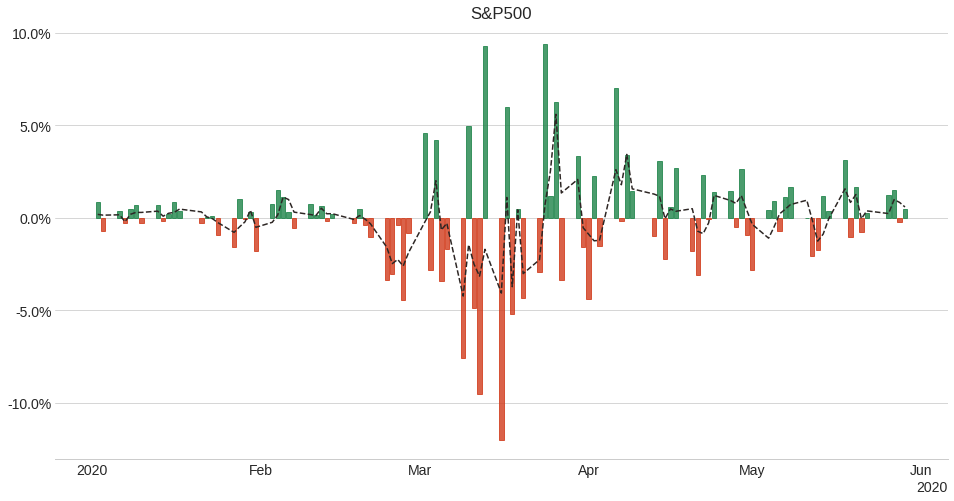

In [26]:
fig, ax = plt.subplots()
out = my_plotter(fig, ax, df, '2020-01', '2020-05', 'S&P500')

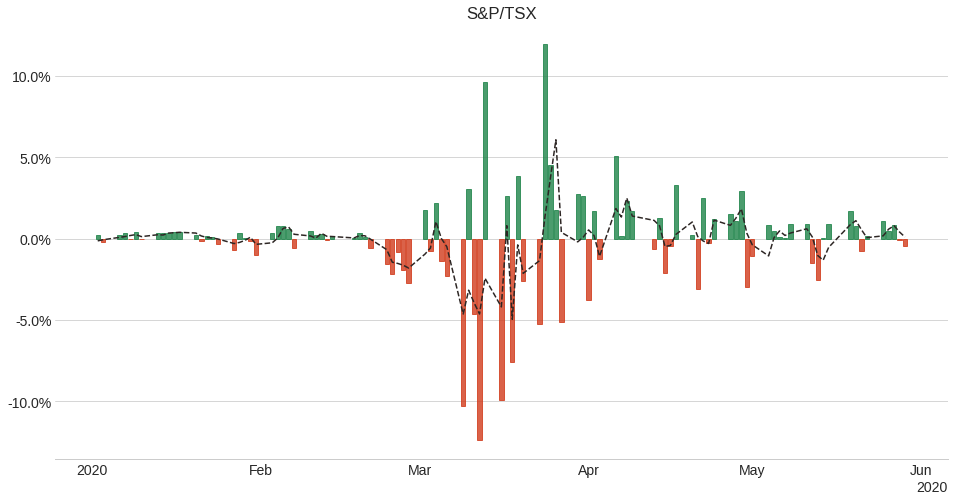

In [27]:

fig, ax = plt.subplots()
out = my_plotter(fig, ax, dft, '2020-01', '2020-05', 'S&P/TSX')

#TSLA vs normal stock over a year

In [28]:
tsla = yf.download(tickers='TSLA', period='1y', interval='1d')
aapl = yf.download(tickers='AAPL', period='1y', interval='1d')
tsla.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
aapl.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
tsla.tail()
aapl.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close,Volume
Date,,
2020-07-23,371.380005,49251100
2020-07-24,370.459991,46359700
2020-07-27,379.239990,30303500
2020-07-28,373.010010,25906400
2020-07-29,380.160004,22500400


In [29]:
tsla_origin = tsla.loc['20200302', 'Close']
aapl_origin = aapl.loc['20200302', 'Close']

In [30]:
tsla['Change over 1y'] = ((tsla['Close'] - tsla_origin) / tsla_origin) * 100
aapl['Change over 1y'] = ((aapl['Close'] - aapl_origin) / aapl_origin) * 100

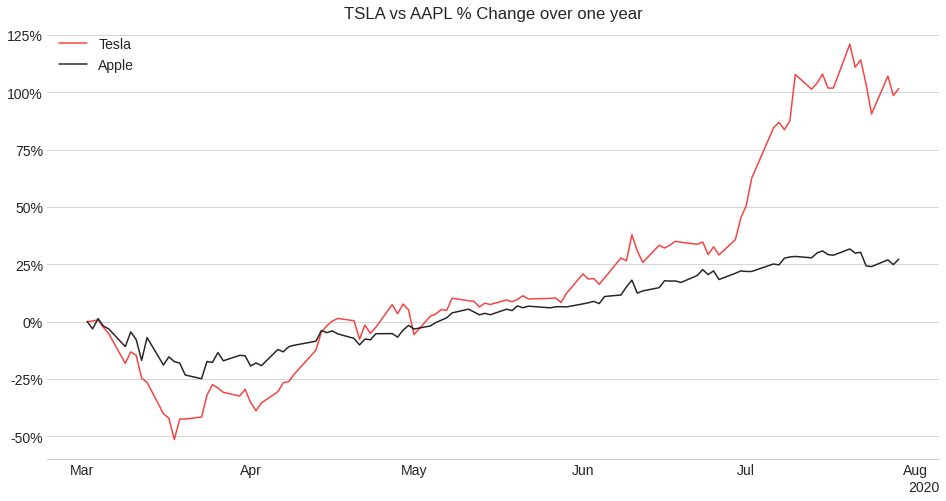

In [31]:

# %matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.plot(tsla.loc['20200301':].index, tsla.loc['20200301':, 'Change over 1y'], color='#f54242', linestyle='-', alpha=1, label='Tesla')
ax.plot(aapl.loc['20200301':].index, aapl.loc['20200301':, 'Change over 1y'], color='#2b2424', linestyle='-', alpha=1, label='Apple')
ax.yaxis.set_major_formatter(PercentFormatter())
ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(ConciseDateFormatter(AutoDateLocator()))
ax.grid(b=False, axis='x')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.legend()
txt_out = ax.set_title("TSLA vs AAPL % Change over one year")